#Project Assignment 3: Model and Communicate (Visual Analytics Sprint)






## Part A: Data Card (updated)

**Source & Link:** 515K Hotel Reviews Data in Europe (Kaggle) - https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe/data

**Shape:** 515,738 rows x 20 columns

**Time Coverage:** August 4, 2015 - August 3, 2017



##Column Dictionary:
- **Hotel_Address:** address of the hotel
- **Additional_Number_of_Scoring:** number of scores given without an accompanying review
- **Review_Date:** date when the review was posted
- **Average_Score:** average score of the hotel
- **Hotel_Name:** name of the hotel
- **Reviewer_Nationality:** nationality of the reviewer
- **Negative_Review:** text content of negative review, if the reviewer did not give a negative review it says "No Negative"
- **Review_Total_Negative_Word_Counts:** number of words in negative review
- **Total_Number_of_Reviews:** the total number of reviews
- **Positive_Review:** text content of positve reviews, if the reviewer did not give a positive review it says "No Positive"
- **Review_Total_Positive_Word_Counts:** number of words in positive review
- **Total_Number_of_Reviews_Reviewer_Has_Given:** number of reviews given by the reviewer
- **Reviewer_Score:** score given by the reviewer
- **Tags:** tags given to hotel by the reviewer                         
- **days_since_review:** days between date of review and the date it was scraped                      
- **Hotel_Country:** country of the reviewed hotel
- **Season:** season when review was posted (`Spring`, `Summer`, `Fall`, `Winter`)
- **Average_Score_Category:** bucketed quality label derived from Average_Score
  -  `Low` (≤ 6.0), `Medium` (6.0–8.0), `High` (≥ 8.0)
- **Reviewer_Score_Category:** same as Average_Score_Category but with Reviewer_Score
- **Traveller_Type**: travelling type of the reviewer (e.g. `Couple`, `Solo Traveller`) based on `Tags`
- **Month:** month when review was posted in *numeric* format (1 to 12)
- **Month_Name:** month when review was posted in *text* format (January to December)
- **Year:** year when review was posted




**Key ID Columns:** 'Hotel_Name', 'Review_Date'


##Missingness Snapshot:
N/A


##Quirks:
- **Tags** is a List of Strings that are user-submitted tags, which can be anything
- **Hotel_Country** only includes 6 countries: Netherlands, UK, France, Spain, Italy, Austria


In [3]:
import kagglehub

path = kagglehub.dataset_download("jiashenliu/515k-hotel-reviews-data-in-europe")
print("Path to dataset files:", path)

Using Colab cache for faster access to the '515k-hotel-reviews-data-in-europe' dataset.
Path to dataset files: /kaggle/input/515k-hotel-reviews-data-in-europe


In [4]:
import pandas as pd
df = pd.read_csv(f"{path}/Hotel_Reviews.csv")
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


Inspect

In [5]:
# Shape (rows / cols)
print("Shape (rows, cols):", df.shape)

#Column names and data types
print("\nColumns and data types:")
print(df.dtypes)

#Missingness snapshot
print("\nMissingness:")
print(df.isnull().sum())
print("\nTotal missing: ", df.isnull().sum().sum())
print("\nEstimated Percentage missing (%):")
print((df.isna().mean() * 100).round(2))

#Time coverage (for Review_Date column)
if "Review_Date" in df.columns:
    df["Review_Date"] = pd.to_datetime(df["Review_Date"], errors="coerce")
    print("\nTime coverage:")
    print(df["Review_Date"].min(), " - ", df["Review_Date"].max())


Shape (rows, cols): (515738, 17)

Columns and data types:
Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object

Missingne

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Hotel_Address                               515738 non-null  object        
 1   Additional_Number_of_Scoring                515738 non-null  int64         
 2   Review_Date                                 515738 non-null  datetime64[ns]
 3   Average_Score                               515738 non-null  float64       
 4   Hotel_Name                                  515738 non-null  object        
 5   Reviewer_Nationality                        515738 non-null  object        
 6   Negative_Review                             515738 non-null  object        
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64         
 8   Total_Number_of_Reviews                     515738 non-null  int64        

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Hotel_Address                               515738 non-null  object        
 1   Additional_Number_of_Scoring                515738 non-null  int64         
 2   Review_Date                                 515738 non-null  datetime64[ns]
 3   Average_Score                               515738 non-null  float64       
 4   Hotel_Name                                  515738 non-null  object        
 5   Reviewer_Nationality                        515738 non-null  object        
 6   Negative_Review                             515738 non-null  object        
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64         
 8   Total_Number_of_Reviews                     515738 non-null  int64        

## Part B: Transformations (Old)

In [8]:
# At least 1 map or Series.apply used appropriately (single-column transform). - #stay type, hotel address, hotel country
# transformed Hotel_Address column to exclude country usng apply()
df['Hotel_Address'] = df['Hotel_Address'].str.replace('United Kingdom', 'UK')
hotel_country = df['Hotel_Address'].str.split(' ').str[-1]
df['Hotel_Address'] = df.apply(lambda row: ' '.join(row['Hotel_Address'].split(' ')[:-1]), axis=1)
# add country column
df['Hotel_Country'] = hotel_country
# print(df['Hotel_Country'].value_counts())

df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Netherlands


In [9]:
# At least 1 categorical bucketing (e.g., bands/labels from a numeric column: low/med/high). -# Reviewer experience, guest type
def avg_score_category(avg_score):
  if avg_score <= 6.00:
    return 'Low'
  elif avg_score > 6.00 and avg_score <= 8.00:
    return 'Medium'
  else:
    return 'High'

df['Average_Score_Category'] = df['Average_Score'].apply(avg_score_category)

# (NEW) Order Category
df['Average_Score_Category'] = pd.Categorical(df['Average_Score_Category'], categories=['Low', 'Medium', 'High'], ordered=True)

# ADD Reviewer_Score_Category
df['Reviewer_Score_Category'] = df['Reviewer_Score'].apply(avg_score_category)
df['Reviewer_Score_Category'] = pd.Categorical(df['Reviewer_Score_Category'], categories=['Low', 'Medium', 'High'], ordered=True)
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country,Average_Score_Category,Reviewer_Score_Category
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands,Medium,Low
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands,Medium,Medium
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Netherlands,Medium,Medium
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Netherlands,Medium,Low
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Netherlands,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-30,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677,Austria,High,Medium
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-22,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677,Austria,High,Low
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-19,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677,Austria,High,Low
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-17,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677,Austria,High,High


In [10]:
# At least 1 missing-data handling step (drop, fill, or mark) - explain choice briefly in code comments.
# The Hotel_Address and Hotel_Country details are sufficient for the project
# We do not require latitude and longitude details
df.drop(labels=['lat', 'lng'], inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Hotel_Address                               515738 non-null  object        
 1   Additional_Number_of_Scoring                515738 non-null  int64         
 2   Review_Date                                 515738 non-null  datetime64[ns]
 3   Average_Score                               515738 non-null  float64       
 4   Hotel_Name                                  515738 non-null  object        
 5   Reviewer_Nationality                        515738 non-null  object        
 6   Negative_Review                             515738 non-null  object        
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64         
 8   Total_Number_of_Reviews                     515738 non-null  int64        

## Part B: Transformations (done by Simrit)
- Each review is classied under a season (Spring, Summer, Fall, Winter) to help compare reviews across the year and highlight any patterns in travel habits or hotel performance during specific seasons.
- Converted Review_Date column to datetime objects and created a function that assigns the months to seasons.
- Winter: December, January, February. Spring: March, April, May. Summer: June, July, August. Fall: September, Ocotober, November.
- The function was applied and a new column created called Season

In [11]:
import numpy as np

#Reuse PA2 transforms; add at least one new categorical bucket or boolean mask that improves a visual

df['Review_Date'] = pd.to_datetime(df['Review_Date'], errors= 'coerce')

#function to assign months to seasosns
def get_season(month):
  if month in [12, 1, 2]:
    return "Winter"
  elif month in [3, 4, 5]:
    return "Spring"
  elif month in [6, 7, 8]:
    return "Summer"
  else:
    return "Fall"

#apply function
df['Season'] = df['Review_Date'].dt.month.apply(get_season)

In [12]:

df['Season'].value_counts()

,count
Season,
Summer,142886
Spring,130483
Fall,122241
Winter,120128


In [13]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Hotel_Country,Average_Score_Category,Reviewer_Score_Category,Season
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,Netherlands,Medium,Low,Summer
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,Netherlands,Medium,Medium,Summer
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,Netherlands,Medium,Medium,Summer
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,Netherlands,Medium,Low,Summer
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,Netherlands,Medium,Medium,Summer


## Part B: Transformations (Done by Zain)


*   The tags column is of object type that represents a collection of strings as list in the dataframe.
*    However, each row in the Tags column is not an actual list. I have used the python's ast library https://docs.python.org/3/library/ast.html#ast.literal_eval to convert Tags into a list
*    Furthermore, it is also not having a pattern such as the second element representing traveller type.
*    Therefore, I have extracted traveller types based on the information available from df['Tags'].unique() and df['Tags'].value_counts().

The following traveller_types obtained from df['Tags'].unique() are:


1.   Couple
2.   Family with young children
3.   Solo Traveller
4.   Family with older children
5.   Group

Any type apart from this is considered "Other". Apart from this we account na for an empty list (since pandas isnull() does not consider an empty list as null)

In [14]:
import ast

def traveller(tags):
  # Convert the string representation of the list to an actual list
  tags_list = ast.literal_eval(tags)
  if len(tags_list) == 0 or len(tags_list) == 1:
    return 'na'
  if ' Couple ' in tags_list:
    return 'Couple'
  elif ' Family with young children ' in tags_list:
    return 'Family with young children'
  elif ' Family with older children ' in tags_list:
    return 'Family with old children'
  elif ' Solo traveler ' in tags_list:
    return 'Solo Traveller'
  elif ' Group ' in tags_list:
    return 'Group'
  else:
    return 'Other' # Handle cases where none of the specified tags are present

df['Traveller_Type'] = df['Tags'].apply(traveller)

## Part C: Visualization

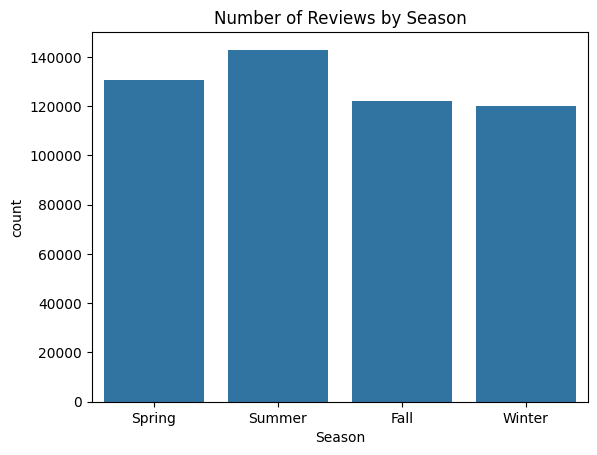

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relationships between Season and # of reviews
season_order = ["Spring", "Summer", "Fall", "Winter"]
df['Season'] = pd.Categorical(df['Season'], categories=season_order, ordered=True)

sns.countplot(data=df, x='Season', order=season_order)
plt.title("Number of Reviews by Season")
plt.show()

In [16]:
# Convert Review_Date to datetime (if not already)
df['Review_Date'] = pd.to_datetime(df['Review_Date'], errors='coerce')

# Extract numeric month (1–12)
df['Month'] = df['Review_Date'].dt.month

# Extract full month name (e.g., "August")
df['Month_Name'] = df['Review_Date'].dt.month_name()

# Extract year (e.g., 2017)
df['Year'] = df['Review_Date'].dt.year

df.Year.unique()

array([2017, 2016, 2015], dtype=int32)

/tmp/ipython-input-2576979654.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.countplot(data=df, x='Month_Name', order=pd.date_range("2000-01-01", periods=12, freq="M").month_name())


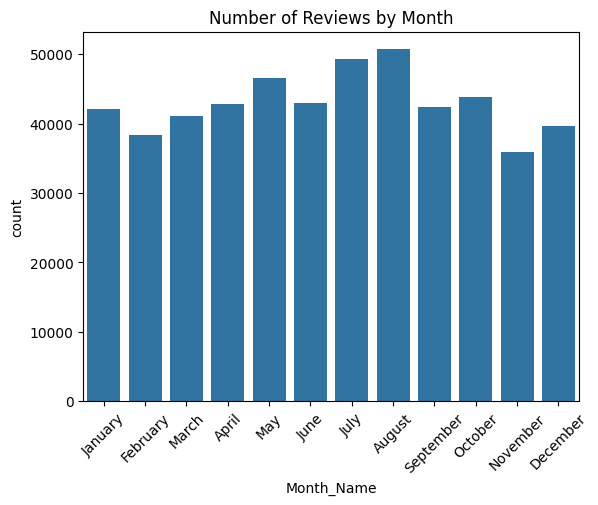

In [17]:
# Numeric month (1–12)
df['Month'] = df['Review_Date'].dt.month

# OR, full month name (e.g., "August")
df['Month_Name'] = df['Review_Date'].dt.month_name()

sns.countplot(data=df, x='Month_Name', order=pd.date_range("2000-01-01", periods=12, freq="M").month_name())
plt.xticks(rotation=45)
plt.title("Number of Reviews by Month")
plt.show()

### Regression view: lmplot (document ci choice, order, and any filtering).

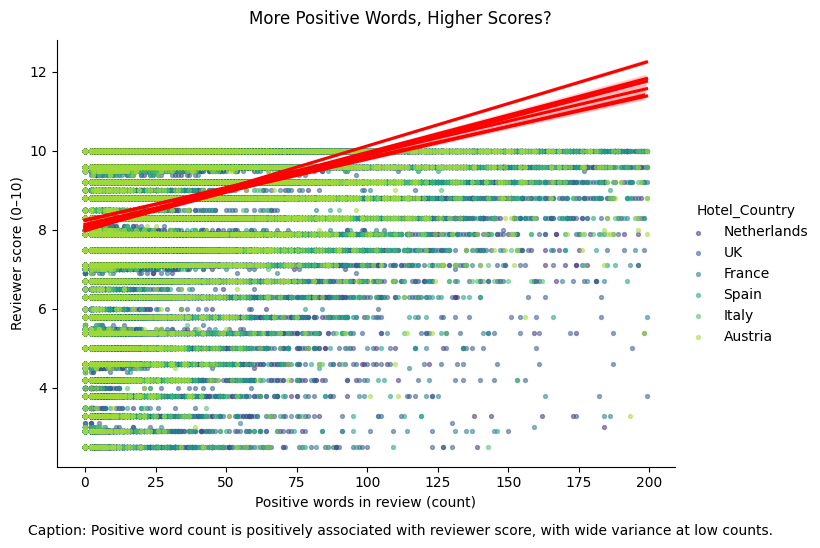

In [18]:
# ----- Linear Regression: Reviewer_Score ~ Review_Total_Positive_Word_Counts -----
# Filter: trim extreme word counts to stabilize fit (documented choice)
pos_wc_max = 200
df_reg = df[df['Review_Total_Positive_Word_Counts'] < pos_wc_max]

g = sns.lmplot(
    data=df_reg,
    x="Review_Total_Positive_Word_Counts",
    y="Reviewer_Score",
    scatter_kws={"s": 8, "alpha": 0.5},
    line_kws={"color": "red"},
    ci=95,
    order=1,
    height=5, aspect=1.4,
    hue='Hotel_Country',
    palette="viridis",
)
g.set_axis_labels("Positive words in review (count)", "Reviewer score (0–10)")
g.fig.suptitle("More Positive Words, Higher Scores?", y=1.03)
g.fig.text(0.5, -0.02, "Caption: Positive word count is positively associated with reviewer score, with wide variance at low counts.", ha="center")
plt.show()

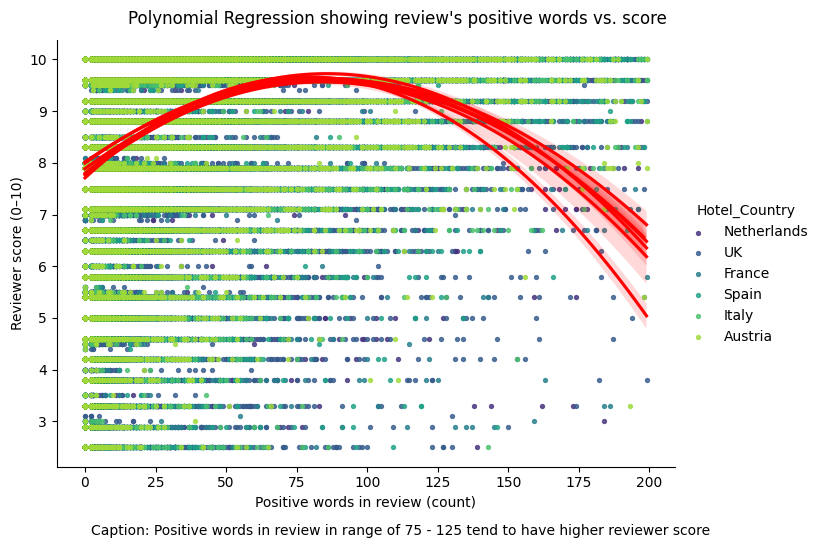

In [19]:
# Using polynomial line to see better pattern
g = sns.lmplot(
    data=df_reg,
    x="Review_Total_Positive_Word_Counts",
    y="Reviewer_Score",
    scatter_kws={"s": 8},
    line_kws={"color": "red"},
    ci=95,
    order=2,
    height=5, aspect=1.4,
    hue='Hotel_Country',
    palette="viridis",
)
g.set_axis_labels("Positive words in review (count)", "Reviewer score (0–10)")
g.fig.suptitle("Polynomial Regression showing review's positive words vs. score ", y=1.03)
g.fig.text(0.5, -0.02, "Caption: Positive words in review in range of 75 - 125 tend to have higher reviewer score", ha="center")
plt.show()

/tmp/ipython-input-3259446176.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='center')


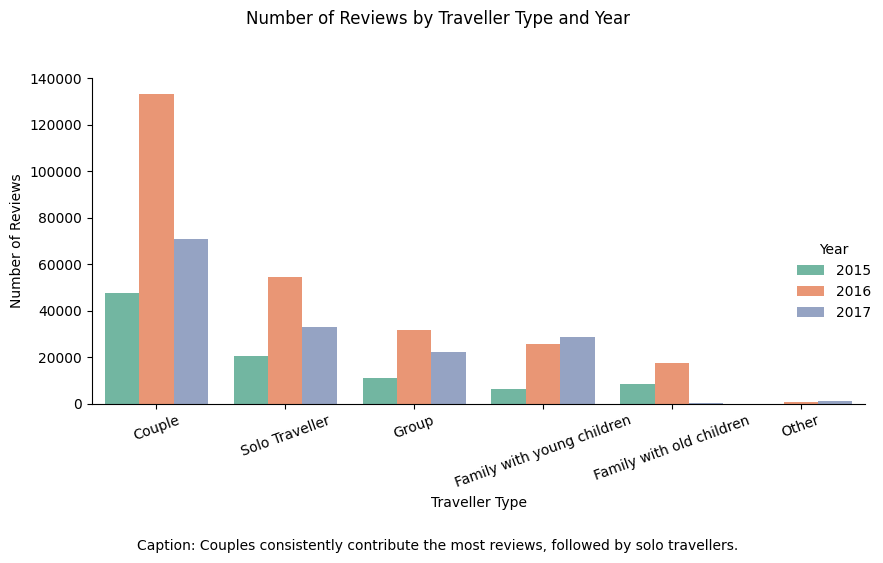

In [20]:
# 1. Keep 'na' in the dataset, but exclude from THIS plot
df_plot = df[df['Traveller_Type'] != 'na'].copy()

# 2. Pre-aggregate counts per Traveller_Type × Year
counts = (
    df_plot
      .groupby(['Traveller_Type', 'Year'], dropna=False)
      .size()
      .reset_index(name='n_reviews')
)

# 3. Set a consistent category order for Traveller_Type
order = ['Couple', 'Solo Traveller', 'Group',
         'Family with young children', 'Family with old children', 'Other']
counts['Traveller_Type'] = pd.Categorical(counts['Traveller_Type'], categories=order, ordered=True)

# 4. Plot grouped bars (side-by-side)
g = sns.catplot(
    data=counts,
    kind="bar",
    x="Traveller_Type",
    y="n_reviews",
    hue="Year",
    dodge=True,
    height=5,
    aspect=1.6,
    palette="Set2",
    order=order
)

# 5) labels, title, tick rotation, caption
g.set_axis_labels("Traveller Type", "Number of Reviews")
g.fig.suptitle("Number of Reviews by Traveller Type and Year", y=1.03)

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='center')

plt.figtext(0.5, -0.05,
            "Caption: Couples consistently contribute the most reviews, followed by solo travellers.",
            ha="center")
plt.tight_layout()
plt.show()

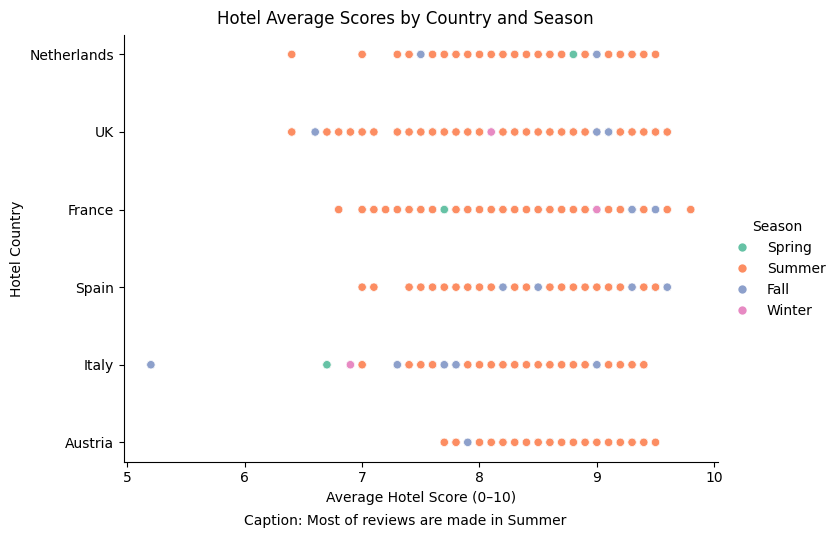

In [21]:
g = sns.relplot(
    data=df,
    x="Average_Score",
    y="Hotel_Country",
    hue="Season",          # color by Season
    palette="Set2",
    aspect=1.5,
    height=5
)

g.set_axis_labels("Average Hotel Score (0–10)", "Hotel Country")
g.fig.suptitle("Hotel Average Scores by Country and Season", y=1.02)
plt.figtext(0.5, -0.01, "Caption: Most of reviews are made in Summer", ha="center")
plt.show()

### Small multiples: relplot/catplot with col=/row=/col_wrap and shared axes.

/tmp/ipython-input-2203259239.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


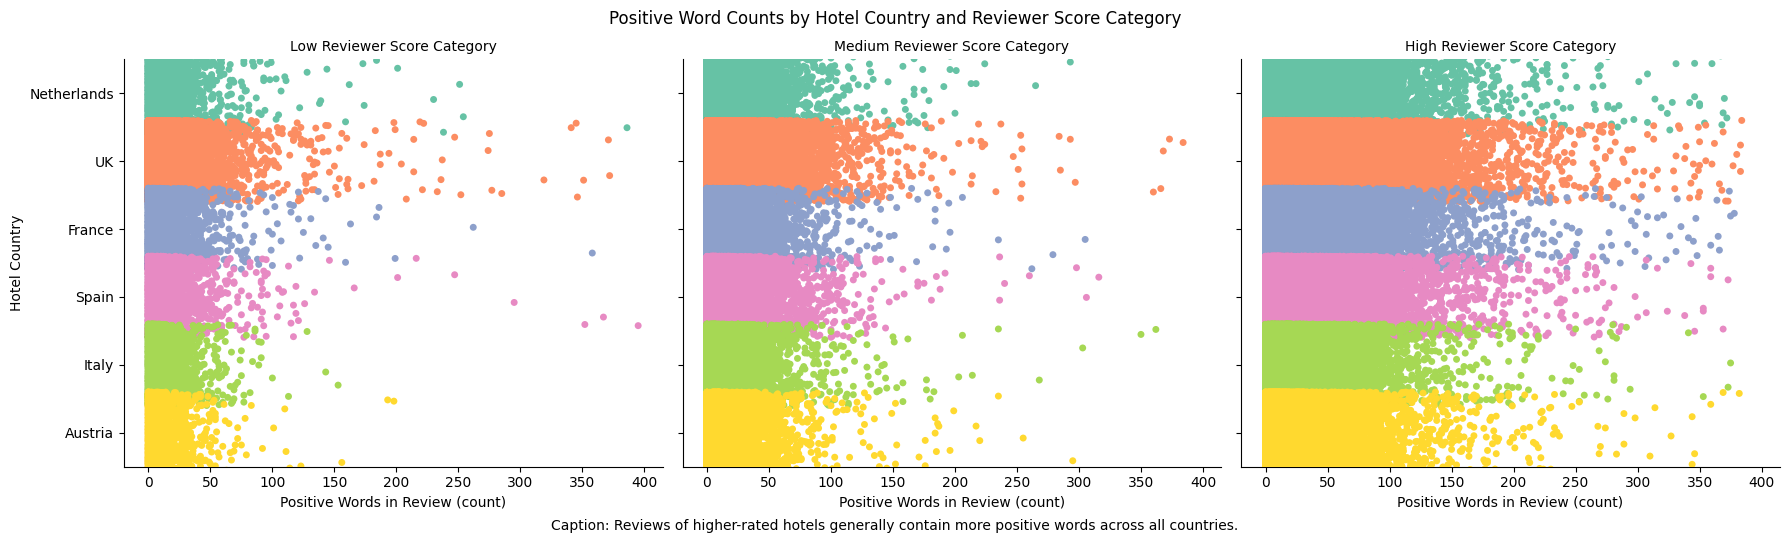

In [22]:
order = ['Low', 'Medium', 'High']
counts['Traveller_Type'] = pd.Categorical(counts['Traveller_Type'], categories=order, ordered=True)


g = sns.catplot(
    data=df,
    x="Review_Total_Positive_Word_Counts",
    y="Hotel_Country",
    kind="strip",
    col="Reviewer_Score_Category",   # facet by score category
    col_wrap=3,                     # 3 columns per row
    aspect=1.2,
    height=5,
    jitter=0.6,
    palette="Set2",
)

# Customize titles and labels
g.set_axis_labels("Positive Words in Review (count)", "Hotel Country")
g.set_titles("{col_name} Reviewer Score Category")
g.fig.suptitle("Positive Word Counts by Hotel Country and Reviewer Score Category", y=1.03)
plt.figtext(0.5, -0.01, "Caption: Reviews of higher-rated hotels generally contain more positive words across all countries.", ha="center")
plt.show()

In [23]:
df['Average_Score_Category'].unique()

['Medium', 'High', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']

### Categorical distribution: catplot(kind="box" | "violin" | "swarm" | "strip")

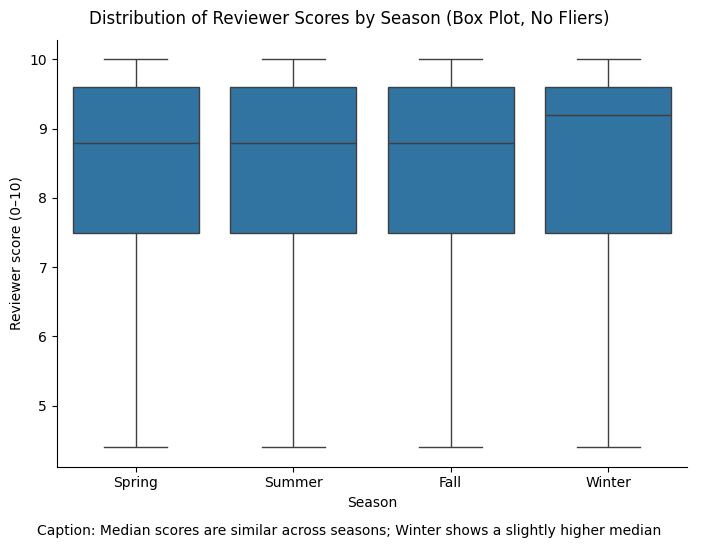

In [24]:
g = sns.catplot(
    data=df,
    x="Season", y="Reviewer_Score",
    kind="box",
    order=season_order,
    showfliers=False,    # cleaner summary of central tendency & IQR
    height=5, aspect=1.4
)
g.set_axis_labels("Season", "Reviewer score (0–10)")
g.fig.suptitle("Distribution of Reviewer Scores by Season (Box Plot, No Fliers)", y=1.03)
g.fig.text(0.5, -0.02, "Caption: Median scores are similar across seasons; Winter shows a slightly higher median", ha="center")
plt.show()

In [31]:
df.groupby('Season').Reviewer_Score.describe()

/tmp/ipython-input-591145623.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Season').Reviewer_Score.describe()


,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
Spring,130483.0,8.428759,1.615104,2.5,7.5,8.8,9.6,10.0
Summer,142886.0,8.379319,1.651660,2.5,7.5,8.8,9.6,10.0
Fall,122241.0,8.294403,1.675722,2.5,7.5,8.8,9.6,10.0
Winter,120128.0,8.479678,1.600732,2.5,7.5,9.2,9.6,10.0


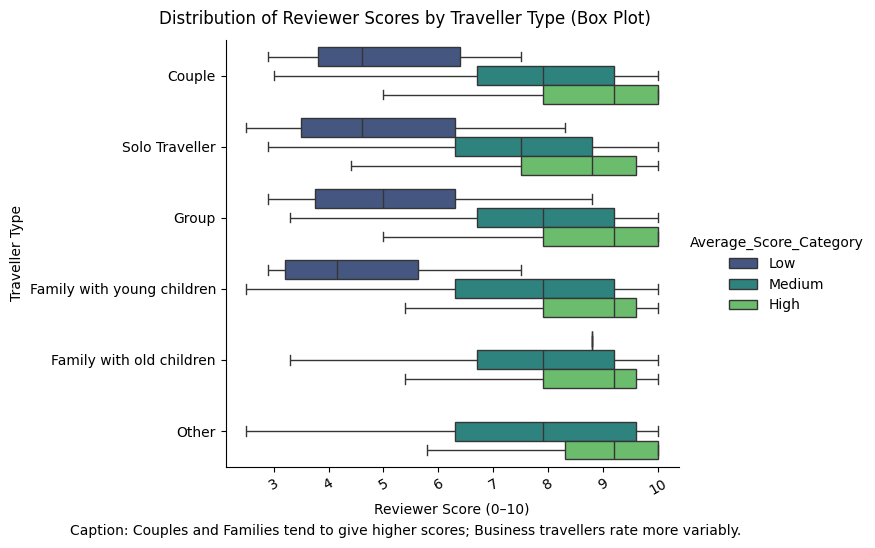

In [25]:
g = sns.catplot(
    data=df[df['Traveller_Type'] != 'na'],
    y="Traveller_Type",
    x="Reviewer_Score",
    kind="box",
    hue="Average_Score_Category",
    palette="viridis",
    showfliers=False,
    height=5,
    aspect=1.5,
    order=['Couple', 'Solo Traveller', 'Group',
           'Family with young children', 'Family with old children', 'Other']
)
g.set_axis_labels("Reviewer Score (0–10)", "Traveller Type")
g.fig.suptitle("Distribution of Reviewer Scores by Traveller Type (Box Plot)", y=1.03)
g.fig.text(0.5, -0.02, "Caption: Couples and Families tend to give higher scores; Business travellers rate more variably.", ha="center")
plt.xticks(rotation=30)
plt.show()

Text(0.5, -0.02, 'Caption: Some countries show consistently higher average hotel scores.')

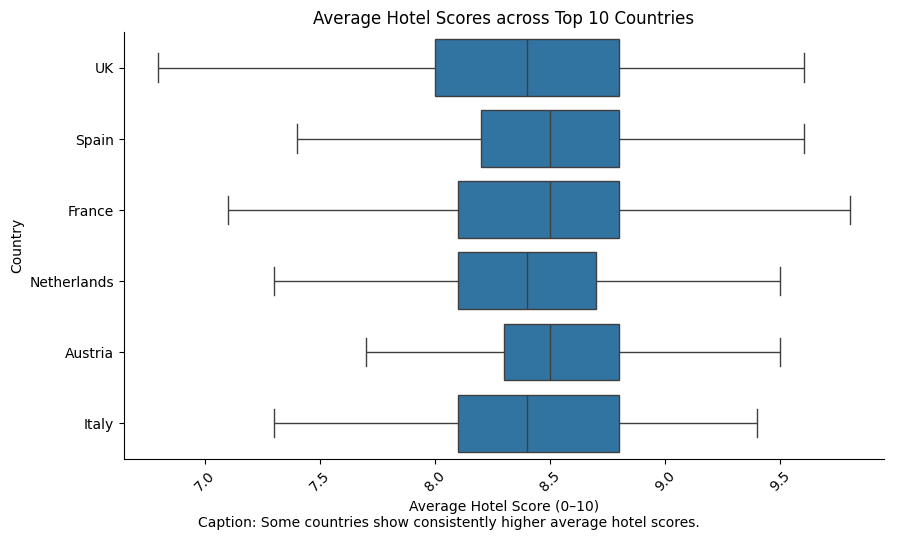

In [26]:
top_countries = df['Hotel_Country'].value_counts().nlargest(10).index
sns.catplot(
    data=df[df['Hotel_Country'].isin(top_countries)],
    y="Hotel_Country",
    x="Average_Score",
    kind="box",
    order=top_countries,
    height=5,
    aspect=1.8,
    showfliers=False
).set(
    title="Average Hotel Scores across Top 10 Countries",
    ylabel="Country",
    xlabel="Average Hotel Score (0–10)"
)
plt.xticks(rotation=45)
plt.figtext(0.5, -0.02, "Caption: Some countries show consistently higher average hotel scores.", ha="center")


Text(0.5, -0.02, 'Caption: Some countries show consistently higher average hotel scores.')

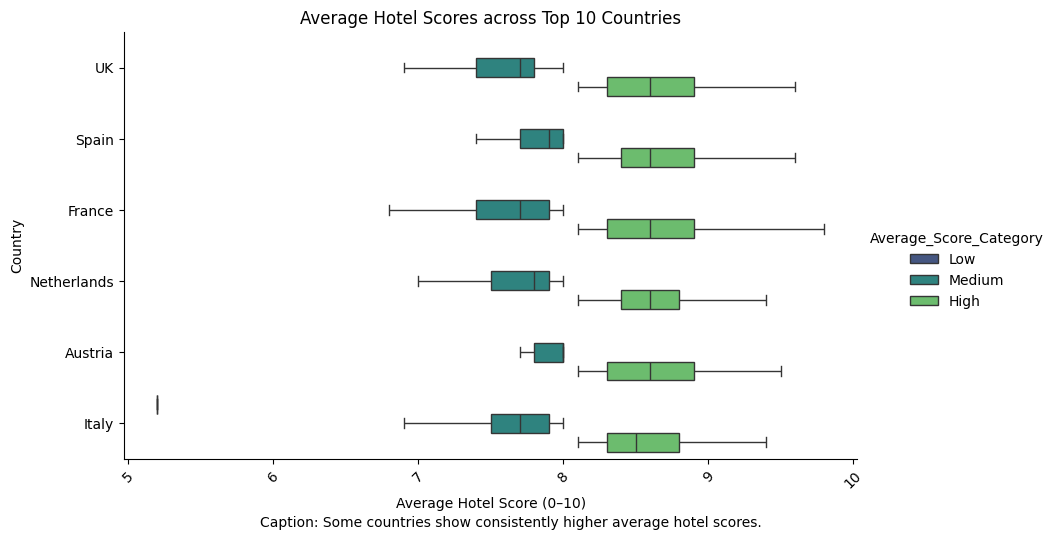

In [27]:
top_countries = df['Hotel_Country'].value_counts().nlargest(10).index
sns.catplot(
    data=df[df['Hotel_Country'].isin(top_countries)],
    y="Hotel_Country",
    x="Average_Score",
    kind="box",
    order=top_countries,
    height=5,
    aspect=1.8,
    hue="Average_Score_Category",
    palette="viridis",
    showfliers=False
).set(
    title="Average Hotel Scores across Top 10 Countries",
    ylabel="Country",
    xlabel="Average Hotel Score (0–10)"
)
plt.xticks(rotation=45)
plt.figtext(0.5, -0.02, "Caption: Some countries show consistently higher average hotel scores.", ha="center")
